# 第2部　Pythonによる時系列分析の基本

## 第3章　Pythonによる統計分析の基本

### 分析の準備

In [8]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats         # 导入科学计算库scipy中的统计模块

# 統計モデルを推定するライブラリ
import statsmodels.api as sm    # 导入统计建模库statsmodels，并简写为sm
import statsmodels.formula.api as smf   # 导入statsmodels的公式API
import pmdarima as pm           # 导入时间序列分析库pmdarima

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns           # 一个基于 matplotlib 的统计数据可视化库
sns.set()                       # 样式设置函数，但是现在已经弃用

In [9]:
# 表示設定
np.set_printoptions(linewidth=80)       # 设置NumPy数组打印时的最大行宽为80个字符
pd.set_option('display.width', 80)      # 设置Pandas数据框（DataFrame）显示的最大宽度为80个字符

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4       # 设置默认的图表大小为：8 英寸宽，4 英寸高

### 1変量データの分析

#### データの読み込み

In [10]:
# データの読み込み
df1 = pd.read_csv('2-3-1-sample-data-1.csv')
print(df1.head(3))      # 读入数据后只显示前三行

        x
0  14.873
1   8.165
2   8.415


#### 統計量の計算

In [11]:
print(df1.describe())   # 输出所有的统计量

               x
count  30.000000
mean    9.820100
std     3.079053
min     3.095000
25%     7.774250
50%     9.367500
75%    12.384000
max    15.234000


#### 可視化

<Axes: xlabel='x', ylabel='Count'>

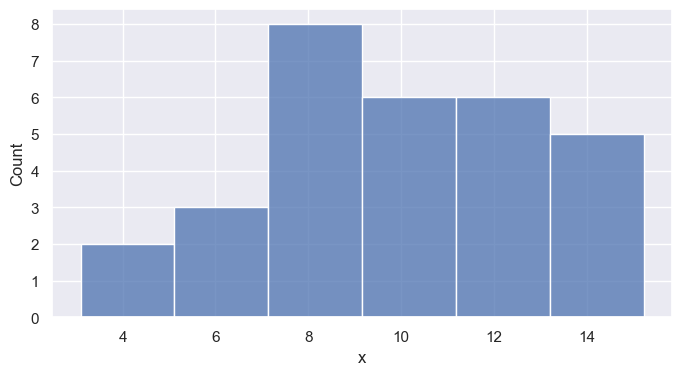

In [12]:
sns.histplot(df1['x'])      # 绘制直方图

#### 平均値の区間推定

「平均値の区間推定」（即“均值的区间估计”）指的是：
这个区间在一定的置信水平（例如 95% 或 99%）下能够包含未知的总体平均值。

In [17]:
# 平均値の区間推定
# 使用固定的函数计算描述性统计量
dsw1 = sm.stats.DescrStatsW(df1['x'])   
print(dsw1)
print(dir(dsw1))
print('標本平均', round(dsw1.mean, 3))  # 样本均值
print('標準偏差', round(dsw1.std, 3))   # 标准差
# 均值的标准误差：用于估计平均值的不确定性。标准误差越小，平均值的估计就越稳定
print('標準誤差', round(dsw1.std_mean, 3))  
# 使用 t 分布计算95%置信区间
print('95％区間', np.round(dsw1.tconfint_mean(alpha=0.05), 3))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_quantile', '_var', 'asrepeats', 'corrcoef', 'cov', 'data', 'ddof', 'demeaned', 'get_compare', 'mean', 'nobs', 'quantile', 'std', 'std_ddof', 'std_mean', 'sum', 'sum_weights', 'sumsquares', 'tconfint_mean', 'ttest_mean', 'ttost_mean', 'var', 'var_ddof', 'weights', 'zconfint_mean', 'ztest_mean', 'ztost_mean']
標本平均 9.82
標準偏差 3.027
標準誤差 0.562
95％区間 [ 8.67 10.97]


#### 平均値に対するt検定

单样本 t 检验（One-sample t-test） 是用来判断一个样本的均值，是否与已知或理论上的某个特定均值（例如 0、10、某个标准值等）有显著差异的检验方法。

单样本 t 检验在实际工作和研究中非常常用，尤其在质量检测、医学实验、问卷调查等场景下，判断某一指标（均值）是否与预期或标准值有差异。

备注：单样本 t 检验只适合比较一个样本与一个固定值𝜇0。如果想比较两个不同样本（两组数据）是否在均值上显著不同，需要用双样本 t 检验（two-sample t-test）

In [18]:
# t値、p値、dfが出力される   双侧检验
np.round(dsw1.ttest_mean(value=10, alternative='two-sided'), 3)

# t 值：表示样本均值与 10 的差异有多显著（标准化后的差异）
# p 值：若 p 值很小（比如小于 0.05），通常说明你有理由拒绝“均值 = 10”的原假设，从而可以认为均值与 10 有显著差异。
# 自由度：反映检验统计量 t 的分布范围，一般是样本量减 1，也会影响到 t 分布的形状。

array([-0.32 ,  0.751, 29.   ])

In [19]:
# 参考：片側検定 只关心某一个方向上的差异
print(np.round(dsw1.ttest_mean(value=10, alternative='larger'), 3))
print(np.round(dsw1.ttest_mean(value=10, alternative='smaller'), 3))

[-0.32   0.624 29.   ]
[-0.32   0.376 29.   ]


In [20]:
# 下面的代码可以用三行完成单样本 t 检验
# 3行プログラミング
df1 = pd.read_csv('2-3-1-sample-data-1.csv')
dsw1 = sm.stats.DescrStatsW(df1['x'])
np.round(dsw1.ttest_mean(value=10, alternative='two-sided'), 3)

array([-0.32 ,  0.751, 29.   ])

### 2変量データの分析（数量×カテゴリー）

#### データの読み込み

In [21]:
# データの読み込み
df2 = pd.read_csv('2-3-2-sample-data-2.csv')
print(df2.head(3))

       x category
0  9.624        A
1  7.388        A
2  7.472        A


#### 統計量の計算

In [22]:
# 按照 category 组分类统计数据
print(df2.groupby('category').describe())

             x                                                           
         count      mean       std    min     25%    50%      75%     max
category                                                                 
A         15.0  7.923867  1.256656  5.698  7.3135  7.678   8.9995   9.745
B         15.0  9.868733  2.328365  6.698  7.6575  9.631  11.6695  13.434


#### 可視化

<Axes: xlabel='x', ylabel='Count'>

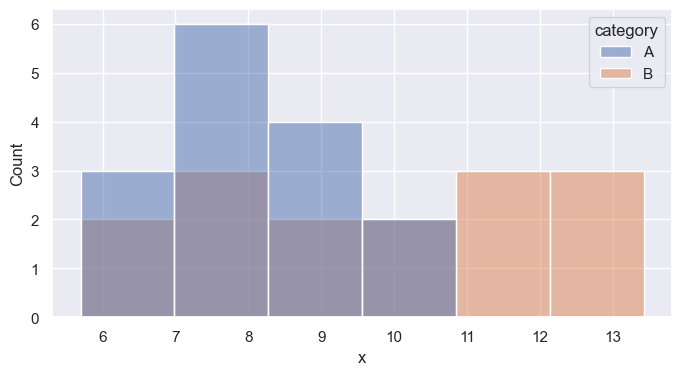

In [ ]:
# 绘制直方图
sns.histplot(x='x', hue='category', data=df2)

<Axes: xlabel='category', ylabel='x'>

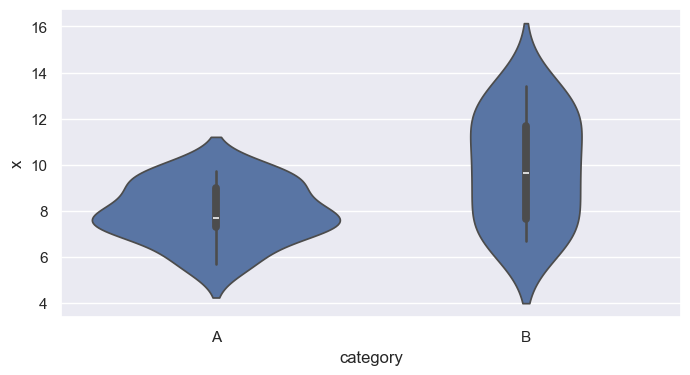

In [ ]:
# 绘制小提琴图：表示该类别下 'x' 值的概率分布密度。越宽表示数据越集中
# 中间显示中位数和四分位数位置
sns.violinplot(x='category', y='x', data=df2)

# 以直观地比较不同类别（'category'）在 'x' 这个指标上的分布形状、集中趋势和离散程度。

#### 平均値の差の区間推定

In [25]:
# 查询 category 为 A 的数据，显示前三行
# query 执行后会返回一个新的 DataFrame，其中仅包含 category 值为 "A" 的所有行
print(df2.query('category == "A"').head(3))

       x category
0  9.624        A
1  7.388        A
2  7.472        A


In [26]:
# データの分割  把 x 列的数据淡出拆分出来存在变量中
category_a = df2.query('category == "A"')['x']
category_b = df2.query('category == "B"')['x']

In [27]:
#平均値の差の信頼区間   得到统计对象
dsw2_a = sm.stats.DescrStatsW(category_a)
dsw2_b = sm.stats.DescrStatsW(category_b)

# 比较两个统计对象的类
cm = sm.stats.CompareMeans(dsw2_a, dsw2_b)  
# 计算两个均值差的置信区间。显著性水平为 5%，对应 95% 的置信区间；unequal表示假设两个样本的方差不相同
np.round(cm.tconfint_diff(alpha=0.05, usevar='unequal'), 3)

array([-3.363, -0.526])

对上面 cell 代码的解释：
我们通常手里只有两组样本数据，这些样本只是从更大的总体中抽取的一小部分。因此，用样本平均值去估计总体平均值时，会存在抽样误差。

区间比点估计更能反映不确定性。
一个置信区间会告诉你“我们对这个均值差的估计并非只有一个数，而是在某个范围内浮动，并且在一定概率（置信度）下认为真值落在这个范围中”。

如果这个差异的置信区间包含 0，那么就无法排除“两个总体平均值可能相同（即差为 0）”的可能性。
如果置信区间完全大于 0 或完全小于 0，则可以推断这两个总体的平均值存在一定程度上的显著差异。

#### 平均の差に対するt検定

下面其实就是两种写法：

要么定义一个比较两个统计对象的类cm，传入到 cm.ttest_ind
要么直接把两个统计对象直接传入到 sm.stats.ttest_ind

In [28]:
# 针对“两个独立样本之间是否存在显著均值差异”进行 t 检验
# t値、p値、dfが出力される
np.round(cm.ttest_ind(usevar='unequal', alternative='two-sided'), 3)

array([-2.8470e+00,  1.0000e-02,  2.1518e+01])

In [29]:
# t値、p値、dfが出力される
np.round(sm.stats.ttest_ind(
    category_a, category_b, 
    usevar='unequal', alternative='two-sided'), 3)

array([-2.8470e+00,  1.0000e-02,  2.1518e+01])

### 2変量データの分析（数量×数量）

#### データの読み込み

In [30]:
# データの読み込み
df3 = pd.read_csv('2-3-3-sample-data-3.csv')
print(df3.head(3))

        x       y
0  46.243  36.461
1  23.882  20.932
2  24.718  19.277


#### 統計量の計算

In [31]:
print(df3.describe())

               x          y
count  30.000000  30.000000
mean   29.400567  29.133033
std    10.263615   9.645102
min     6.985000   5.418000
25%    22.581750  23.143500
50%    27.891000  30.262000
75%    37.947500  36.180750
max    47.448000  44.831000


#### 可視化

<Axes: xlabel='x', ylabel='y'>

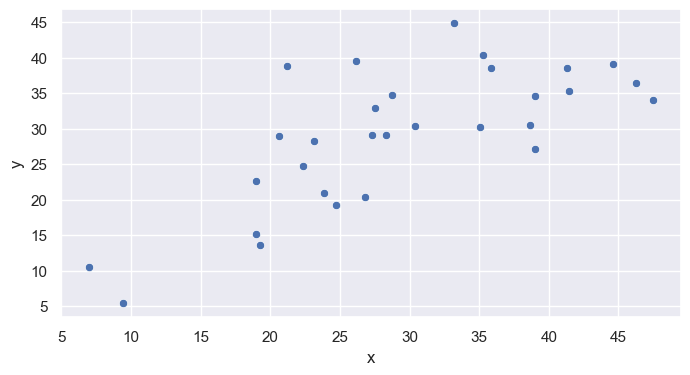

In [32]:
# 散点图
sns.scatterplot(x='x', y='y', data=df3)

#### 回帰分析

In [ ]:
# モデルの構築
# smf是statsmodels.formula.api的简称；ols 是Ordinary Least Squares（最小二乘法，线性回归模型）的简称
lm_model = smf.ols(formula='y ~ x', data=df3).fit()

# 結果の確認
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     31.02
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           5.86e-06
Time:                        22:26:39   Log-Likelihood:                -98.868
No. Observations:                  30   AIC:                             201.7
Df Residuals:                      28   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1027      3.802      2.394      0.0

上面的表格结果怎么看：

上半部分：
Dep. Variable: y  表示被预测的变量是 y
R-squared: 0.526（决定系数）：表示 x 可以解释 y 约 52.6% 的波动。越高说明回归模型对 y 的解释度越高。
F-statistic: 31.02，Prob (F-statistic): 5.86e-06：F 检验用于判断 “整体上，这个模型是否有统计学意义”或“自变量 x 对于解释 y 是否显著有效”。p 值（5.86e-06，非常小）< 0.05，说明模型整体显著
“Df Residuals:28” 指剩余自由度（样本数减去估计参数的数量）。
“Df Model: 1” 指模型自由度（这里只有一个自变量，所以是 1）。

下半部分：


#### 分散分析

In [34]:
# 对上面已经拟合好的线性模型进行方差分析并输出结果
print(sm.stats.anova_lm(lm_model))

            df       sum_sq      mean_sq          F    PR(>F)
x          1.0  1417.965482  1417.965482  31.021716  0.000006
Residual  28.0  1279.846475    45.708803        NaN       NaN


In [ ]:
# 汇总：用 4 行代码就能完成线性回归，同时输出各种统计数据
# まとめ
df3 = pd.read_csv('2-3-3-sample-data-3.csv')
lm_model = smf.ols(formula='y ~ x', data=df3).fit()
print(lm_model.summary())
print(sm.stats.anova_lm(lm_model))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     31.02
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           5.86e-06
Time:                        22:41:17   Log-Likelihood:                -98.868
No. Observations:                  30   AIC:                             201.7
Df Residuals:                      28   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1027      3.802      2.394      0.0

### サンプルデータの利用
https://www.statsmodels.org/dev/datasets/index.html

使用一些 statsmodels 库里面自带的样本数据

#### load_pandas関数の利用

In [36]:
# 尼罗河数据集：https://www.statsmodels.org/dev/datasets/generated/nile.html
nile = sm.datasets.nile.load_pandas().data
print(nile.head(3))

     year  volume
0  1871.0  1120.0
1  1872.0  1160.0
2  1873.0   963.0


In [ ]:
# 参考：別のデータの読み込み
# CO2 数据集：https://www.statsmodels.org/dev/datasets/generated/co2.html
sm.datasets.co2.load_pandas().data.head(3)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6


In [38]:
# 打印 CO2 数据集的说明文本
print(sm.datasets.co2.DESCRLONG)


Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.

Period of Record: March 1958 - December 2001

Methods: An Applied Physics Corporation (APC) nondispersive infrared gas analyzer was used to obtain atmospheric CO2 concentrations, based on continuous data (four measurements per hour) from atop intake lines on several towers. Steady data periods of not less than six hours per day are required; if no such six-hour periods are available on any given day, then no data are used that day. Weekly averages were calculated for most weeks throughout the approximately 44 years of record. The continuous data for year 2000 is compared with flask data from the same site in the graphics section.


In [39]:
print(sm.datasets.nile.COPYRIGHT)
print('---------------')
print(sm.datasets.nile.DESCRLONG)
print('---------------')
print(sm.datasets.nile.NOTE)

This is public domain.
---------------
This dataset contains measurements on the annual flow of
the Nile as measured at Ashwan for 100 years from 1871-1970. There is an apparent changepoint near 1898.
---------------
::

    Number of observations: 100
    Number of variables: 2
    Variable name definitions:

        year - the year of the observations
        volumne - the discharge at Aswan in 10^8, m^3



#### get_rdataset関数の利用

In [ ]:
# 从 statsmodels 提供的接口中下载/获取一个名为 “Nile” 的 R 数据集
sm.datasets.get_rdataset("Nile").data.head(3)

,time,value
0,1871,1120
1,1872,1160
2,1873,963


In [ ]:
# 从 statsmodels 提供的 R 数据集接口中获取 “AirPassengers” 这个数据集
AirPassengers = sm.datasets.get_rdataset("AirPassengers")
print(AirPassengers.data.head(3))

          time  value
0  1949.000000    112
1  1949.083333    118
2  1949.166667    132


In [42]:
print(AirPassengers.__doc__)

.. container::

   .. container::

      ============= ===============
      AirPassengers R Documentation
      ============= ===============

      .. rubric:: Monthly Airline Passenger Numbers 1949-1960
         :name: monthly-airline-passenger-numbers-1949-1960

      .. rubric:: Description
         :name: description

      The classic Box & Jenkins airline data. Monthly totals of
      international airline passengers, 1949 to 1960.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         AirPassengers

      .. rubric:: Format
         :name: format

      A monthly time series, in thousands.

      .. rubric:: Source
         :name: source

      Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time
      Series Analysis, Forecasting and Control.* Third Edition.
      Holden-Day. Series G.

      .. rubric:: Examples
         :name: examples

      .. code:: R

         ## The classic 'airline model', by full ML
         (fit <- arima(log10(AirPassen

#### pmdarimaライブラリのデータ
https://alkaline-ml.com/pmdarima/modules/datasets.html

In [43]:
# 从 pmdarima（pm） 库加载一个名为 “taylor” 的示例数据集
taylor = pm.datasets.load_taylor(as_series=True)
taylor.head(3)

0    22262.0
1    21756.0
2    22247.0
dtype: float64